<a href="https://colab.research.google.com/github/A01793146/demodatabricks/blob/main/Image_enhancement_Equipo29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Image Enhancement

## Table of Contents
1. [Libraries](#libraries)
2. [Histogram Equalization](#hist)
3. [Denoising with Filters](#denoising)
4. [Challenge](#challenge)


## Equipo 29:
- Abraham Rincón Treviño - A00819677
- Juan Carlos García Rendón Martínez - A01793708
- Juan Carlos Garza Sánchez - A00821522
- Emmanuel González Calitl - A01320739
- Alejandro Jesús Vázquez Navarro - A10793146

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [1]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage import exposure
import skimage
from scipy.ndimage.filters import gaussian_filter as gauss
from scipy.ndimage.filters import median_filter as med
import cv2

<ipython-input-1-0238ad4d13f7>:7: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter as gauss
<ipython-input-1-0238ad4d13f7>:8: DeprecationWarning: Please use `median_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import median_filter as med


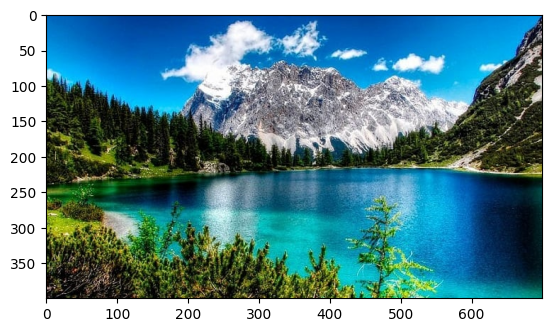

In [6]:
original_image = Image.open('content/image.jpg')
plt.imshow(original_image)
type(original_image)

# Save the image
np.save('content/img.npy', original_image)

#Load the image
original_image = np.load('content/img.npy')

## Histogram Equalization<a class="anchor" id="hist" ></a>

Let's look at the distribution of pixel values in the image.

Ideally, the image should have relatively even distribution of values, indicating good contrast and making it easier to extract analytical information.

An easy way to check this is to plot a histogram.

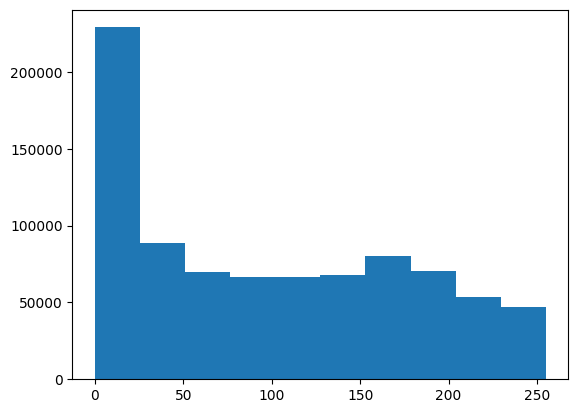

In [7]:
# Plot a histogram - we need to use ravel to "flatten" the 3 dimensions
plt.hist(original_image.ravel())
plt.show()

Another useful way to visualize the statistics of an image is as a cumulative distribution function (CDF) plot. Which shows the cumulative pixel intensity frequencies from 0 to 255.

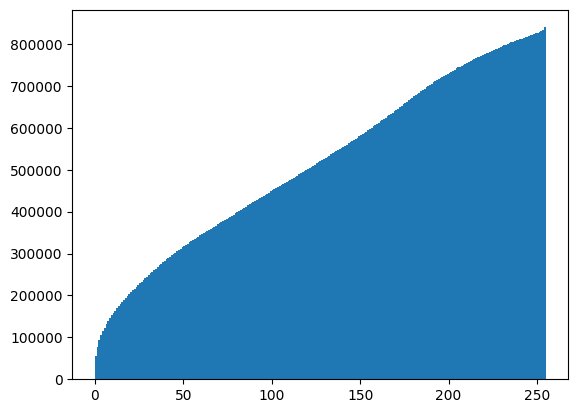

In [8]:
plt.hist(original_image.ravel(), bins=255, cumulative=True)
plt.show()

The histogram and CDF for our image show pretty uneven distribution - there's a lot of contrast in the image. Ideally we should equalize the values in the images we want to analyse to try to make our images more consistent in terms of the shapes they contain irrespective of light levels.

Histogram equalization is often used to improve the statistics of images. In simple terms, the histogram equalization algorithm attempts to adjust the pixel values in the image to create a more uniform distribution. The code in the cell below uses the  **exposure.equalize_hist** method from the **skimage** package to equalize the image.  

/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


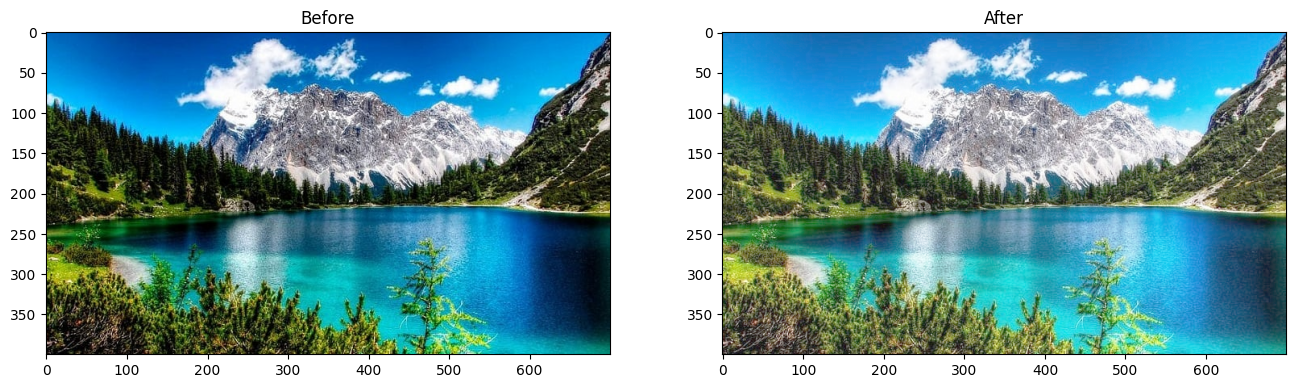

In [9]:
original_image_eq = exposure.equalize_hist(original_image)

fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(original_image)
a.set_title('Before')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(original_image_eq)
a.set_title('After')

plt.show()

As with most image operations, there's more than one way to do this. For example, you could also use the **PIL.ImgOps.equalize** method:

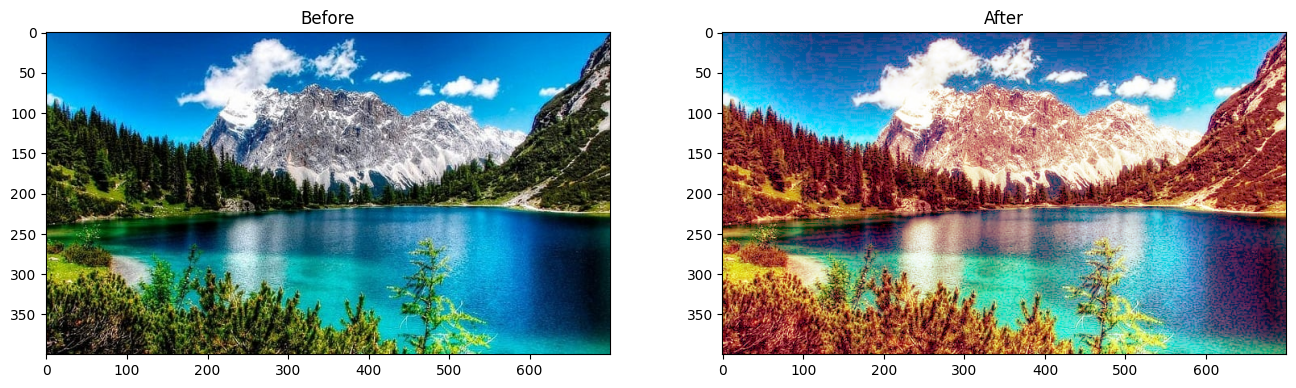

In [10]:

# Equalize the image - but we need to convert the numpy array back to the PIL image format
image_PIL_eq = ImageOps.equalize(Image.fromarray(original_image))

# Display using matplotlib

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(original_image)
a.set_title('Before')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(image_PIL_eq)
a.set_title('After')

plt.show()

Now let's see what that's done to the histogram and CDF plots:

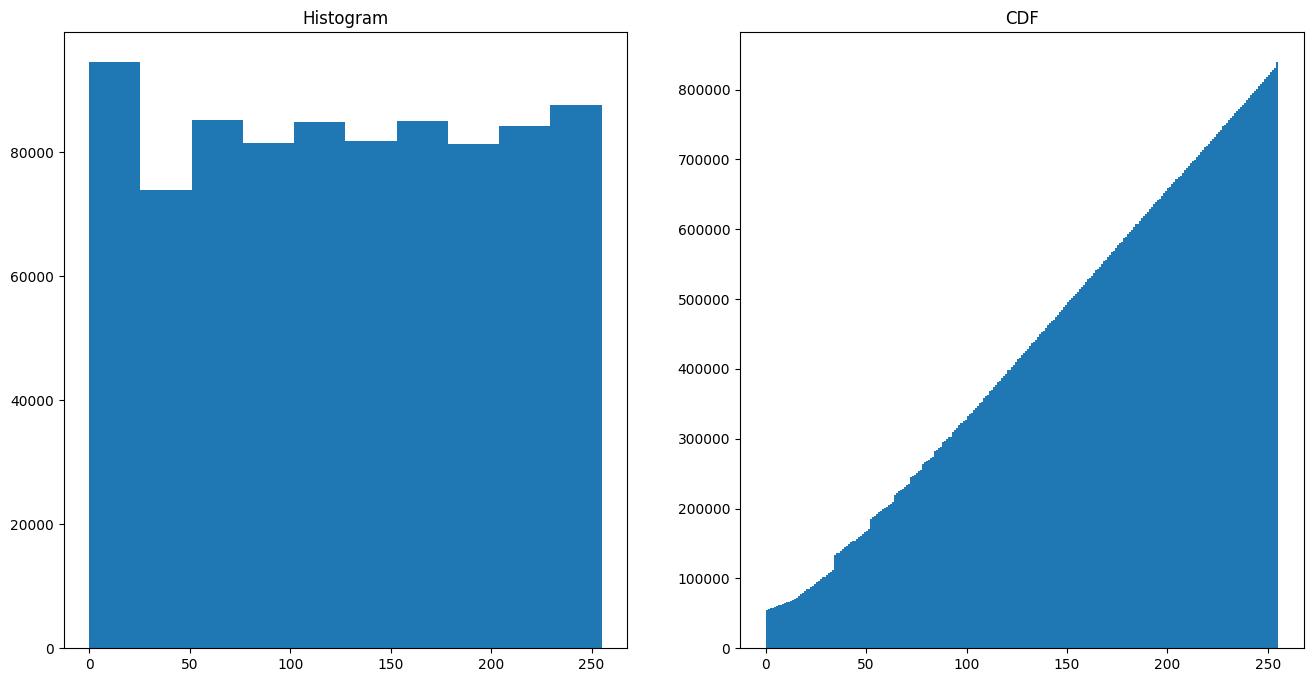

In [11]:
# Display histograms
img_eq = np.array(image_PIL_eq)

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.hist(img_eq.ravel())
a.set_title('Histogram')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.hist(img_eq.ravel(), bins=255, cumulative=True)
a.set_title('CDF')

plt.show()

The pixel intensities are more evenly distributed in the equalized image. In particular, the cumulative density shows a straight diagonal cumulation; which is a good sign that the pixel intensity values have been equalized.

## Denoising with Filters <a class="anchor" id="denoising" ></a>

Often images need to be cleaned up to remove "salt and pepper" noise.

### Add Some Random Noise
Let's add some random noise to our image - such as you might see in a photograph taken in low light or at a low resolution.

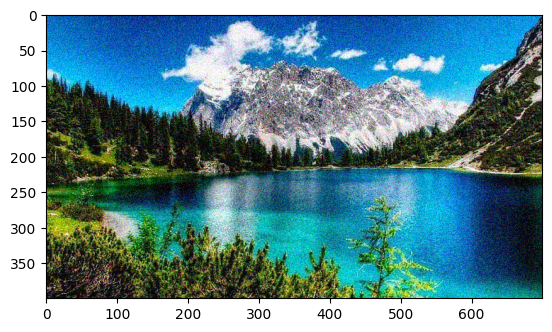

In [12]:
img_n = skimage.util.random_noise(original_image)
plt.imshow(img_n)

### Using a Gaussian Filter
A Gaussian filter applies a weighted average (mean) value for pixels based on the pixels that surround them.

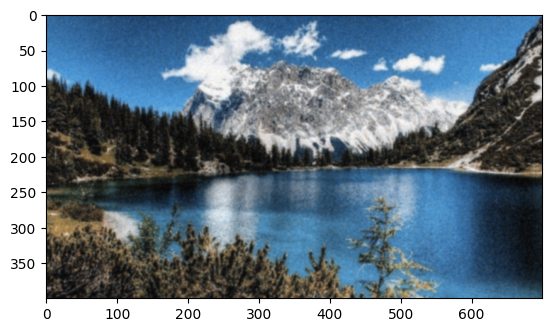

In [13]:
img3_gauss = gauss(img_n, sigma=1)
plt.imshow(img3_gauss)

### Using a Median Filter
The Gaussian filter results in a blurred image, which may actually be better for feature extraction as it makes it easier to find contrasting areas. If it's too blurred, we could try a median filter, which as the name suggests applies the median value to pixels based on the pixels around them.

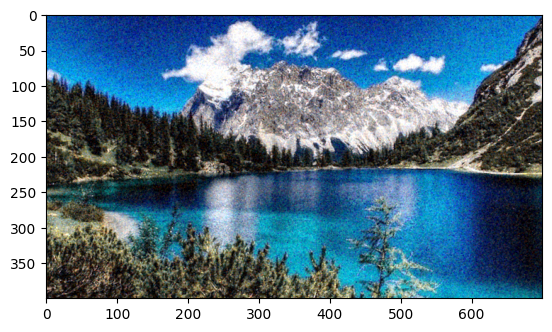

In [14]:
img_med = med(img_n, size=2)
plt.imshow(img_med)

## Challenge <a class="anchor" id="challenge" ></a>

Now, try solving this challenge, you must equalize different windows of the same image in a splitted way.

**1.** Investiga e implementa el método **tile-based histogram equalization**. En estos métodos, la imagen se particiona en diferentes ventanas (i.e. mosaicos) y los histogramas se calculan de forma independiente, aplicando la corrección sobre cada ventana. Existe un compromiso entre el tamaño de la ventana y la complejidad computacional, por lo cual es más complejo que el método simple. Implementa esta versión y realiza algunas pruebas variando el tamaño de la ventana.

In [21]:
#!pip install image_slicer
from image_slicer import slice
import re
import os

In [23]:
rootdir = "content/Image/"
regex = re.compile('(image_.*)')
n = 8
h = int(n ** 0.5 // 1)
w = int(h + 1)
if w*h < n: h+= 1

# Borrar casillas de ejecuciones anteriores
for root, dirs, files in os.walk(rootdir):
  for file in files:
    if regex.match(file):
       os.remove(rootdir + file)

# Separar la imagen en nuevas casillas
slice(rootdir + 'image.jpg', n)

# Guardar nombres en una lista
f_ls = []
for root, dirs, files in os.walk(rootdir):
  for file in files:
    if regex.match(file):
       f_ls.append(rootdir + file)

f_ls = sorted(f_ls)

/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


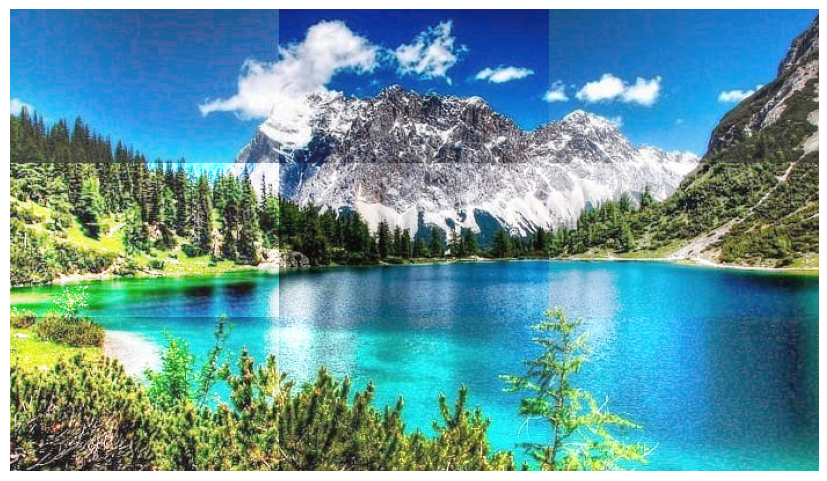

In [24]:
# Ecualizar y mostrar cada casilla
fig, axs = plt.subplots(h, w, figsize=(10.425, 6), gridspec_kw={'hspace': 0,'wspace': 0})

n= 1
for i in f_ls:
  tile = cv2.imread(i)
  tile = cv2.cvtColor(tile, cv2.COLOR_BGR2RGB)
  tile = exposure.equalize_hist(tile)

  plt.subplot(h, w, n)
  plt.axis('off')
  plt.imshow(tile)
  n +=1


plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.savefig(rootdir + 'tile_eq_image.png', bbox_inches='tight', pad_inches=0 )
plt.show()

**Q:** Otro inconveniente es que se puede observar posibles diferencias entre los el contraste de los bloques, ¿cómo podría mejorarse?

**A:**: Implementaremos un par de filtros, empezando por uno Gaussiano con la finalidad de reducir el ruido y suavizar la imagen

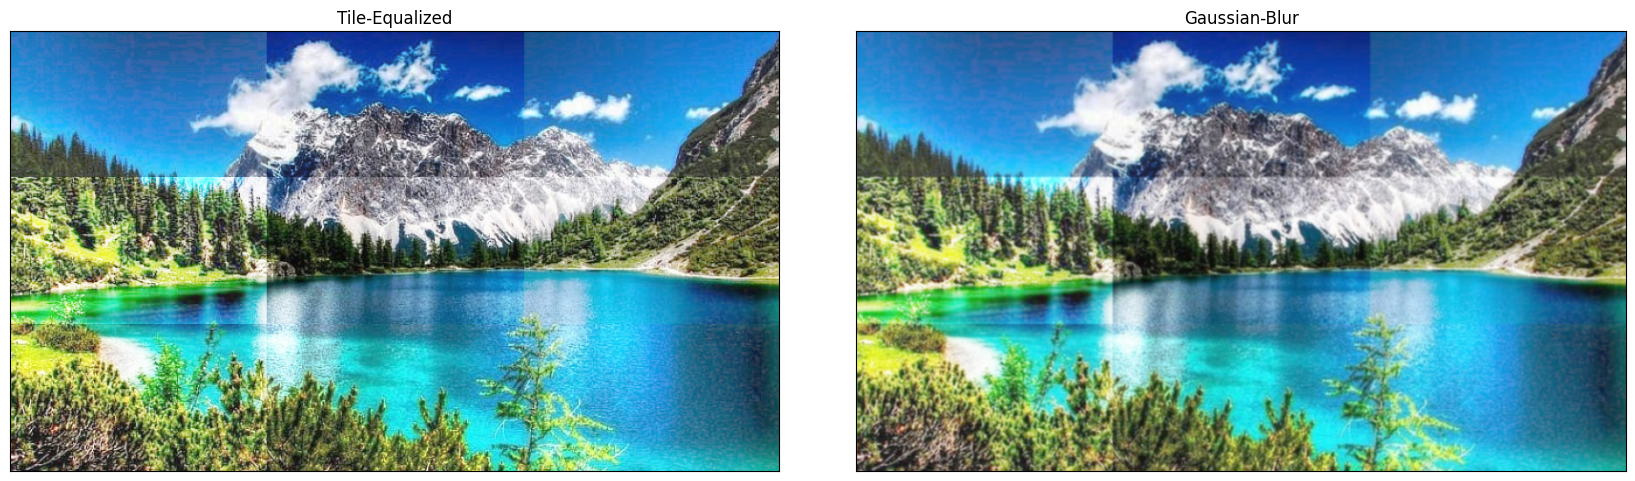

In [25]:
# Cargar la imagen
imgpath = rootdir + 'tile_eq_image.png'

img = cv2.imread(imgpath)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Definir la gráfica y generar Blur Gaussiano
fig, axs = plt.subplots(1, 2, figsize=(20.85, 6), sharex=True, gridspec_kw={'hspace': 0,'wspace': 0.1})

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Tile-Equalized')

plt.subplot(1, 2, 2)
plt.imshow(cv2.GaussianBlur(img, (3,3), 0))
plt.title('Gaussian-Blur')


plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.show()

**2.** Investiga e implementa un método sencillo del Sliding Window Adaptive Histogram Equalization (SWAHE) y compara algunas imágenes con diferentes tipos de imágenes.

**3.**Investiga cómo funciona el algoritmo CLAHE (contrast limited adaptive histogram equalization) y realiza una implementación (puede ser usando la implementación de OpenCV). Prueba sobre diferentes tipos de imágenes y compara con el método de ecualización de histogramas básico. Provee una breve descripción del método a partir de una  investigación bibliográfica.

In [29]:
def clahe_func(file_name, grid=(20,20)):

  # Cargar imagen
  imgpath = 'content/CLAHE/' + file_name
  img = cv2.imread(imgpath)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # Pre procesado
  lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
  l_channel = lab[:, :, 0]

  # Aplicación de CLAHE
  clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(20,20))
  l_channel_clahe = clahe.apply(l_channel)

  lab[:, :, 0] = l_channel_clahe

  img_con = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

  # Mostrar imagenes
  plt.figure(figsize=(10, 5))

  plt.subplot(1, 2, 1)
  plt.imshow(img)
  plt.title('Original')

  plt.subplot(1, 2, 2)
  plt.imshow(img_con)
  plt.title('CLAHE')

  plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
  plt.show()

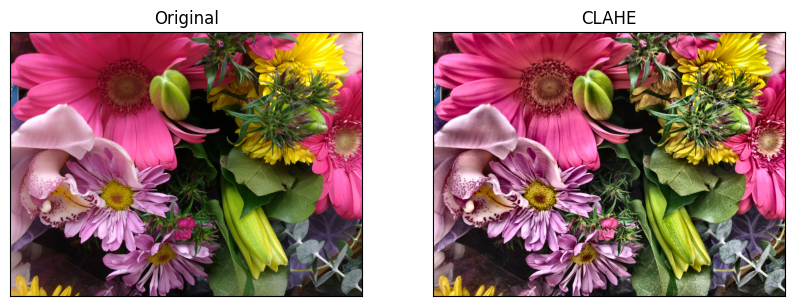

In [30]:
clahe_func('flowers.jpg')

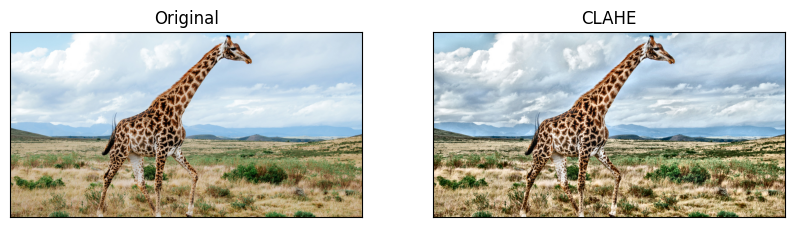

In [31]:
clahe_func('giraffe.jpg')

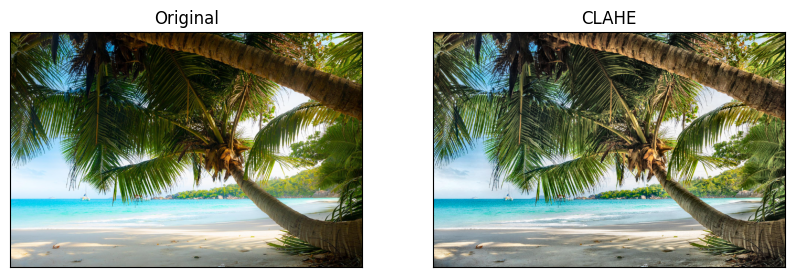

In [32]:
clahe_func('playa.jpg')


```
Fin
```

